In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data
data_filepath = "FinancialPhraseBank-v1.0/Sentences_50Agree.txt"

texts, labels = [], [] 
with open(data_filepath, "r", encoding="ISO-8859-1") as f:
    for line in f:
        text, label = line.strip().split("@")
        texts.append(text)
        labels.append(label)

for i, (text, label) in enumerate(zip(texts[:10], labels[:10]), start=1):
    print(f"Text {i}: {text}\nLabel {i}: {label}")

LABELS = np.unique(labels).tolist() # unique labels
labels_num = [LABELS.index(label) for label in labels]

Text 1: According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .
Label 1: neutral
Text 2: Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said .
Label 2: neutral
Text 3: The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported .
Label 3: negative
Text 4: With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
Label 4: positive
Text 5: According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 

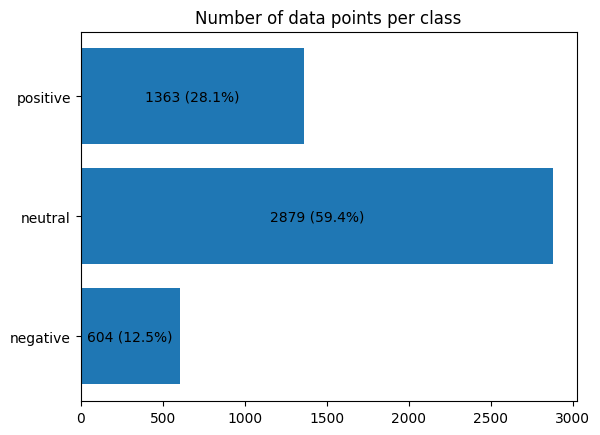

In [3]:
## Plot 1: number of instances per class
counts = [np.sum([label == LABEL for label in labels]) for LABEL in LABELS]

fig, ax = plt.subplots()
bars = ax.barh(LABELS, counts)
ax.set_title("Number of data points per class")

for i, (bar, count) in enumerate(zip(bars, counts)):
    ax.annotate(f"{count} ({count/np.sum(counts) * 100 :.1f}%)", 
                xy = (bar.get_width()/2, bar.get_y() + bar.get_height()/2),
                xytext = (0, 0), 
                textcoords = "offset points",
                xycoords = "data",
                ha = "center", 
                va = "center")

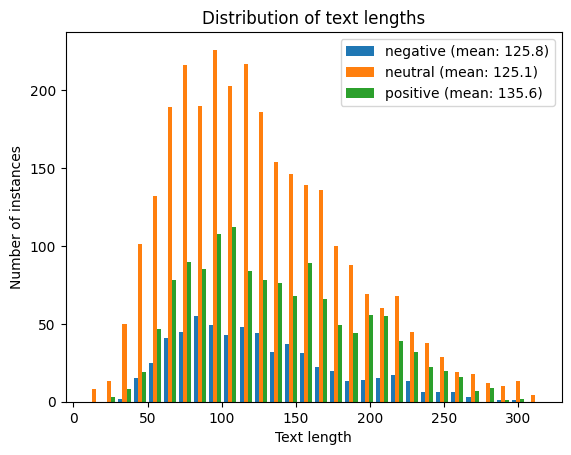

In [4]:
## Plot 2: length of texts (per class) 

# get texts per class 
texts_per_class = [[text for text, label in zip(texts, labels) if label == LABEL] for LABEL in LABELS]
lengths_per_class = [[len(text) for text in class_texts] for class_texts in texts_per_class]
mean_length_per_class = [np.mean(lengths) for lengths in lengths_per_class]

fig, ax = plt.subplots()
ax.hist(lengths_per_class,
        bins = 30,
        label=[f"{LABEL} (mean: {mean:.1f})" for LABEL, mean in zip(LABELS, mean_length_per_class)])

ax.set_ylabel("Number of instances")
ax.set_xlabel("Text length")
ax.set_title("Distribution of text lengths")

ax.legend();

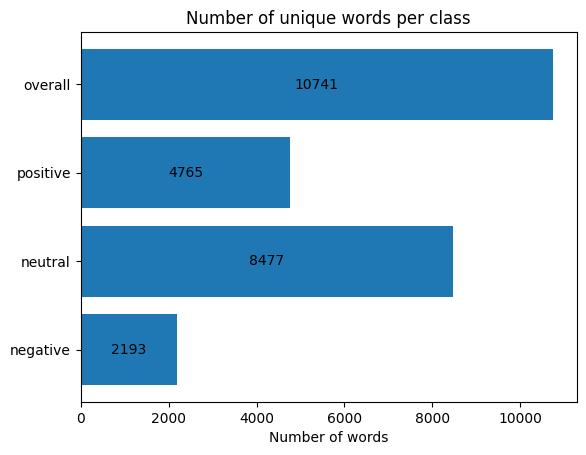

In [5]:
## Plot 3: number of unique words per class
from nltk import word_tokenize 
import string 
import re 

# remove punctuation and numbers for counting words
texts_per_class_cleaned = [["".join([char for char in text if char not in string.punctuation]) for text in texts] for texts in texts_per_class]
texts_per_class_cleaned = [[re.sub(r"\d+", "", text) for text in texts] for texts in texts_per_class_cleaned]
words_per_class = [word_tokenize("\n".join(texts)) for texts in texts_per_class_cleaned]

n_unique_words_per_class = [len(np.unique(words)) for words in words_per_class]
n_unique_words_overall = len(np.unique([word for words in words_per_class for word in words]))

counts = n_unique_words_per_class + [n_unique_words_overall]
fig, ax = plt.subplots()
bars = ax.barh(LABELS + ["overall"], counts)
ax.set_title("Number of unique words per class")
ax.set_xlabel("Number of words")

for i, (bar, count) in enumerate(zip(bars, counts)):
    ax.annotate(f"{count}", 
                xy = (bar.get_width()/2, bar.get_y() + bar.get_height()/2),
                xytext = (0, 0), 
                textcoords = "offset points",
                xycoords = "data",
                ha = "center", 
                va = "center")

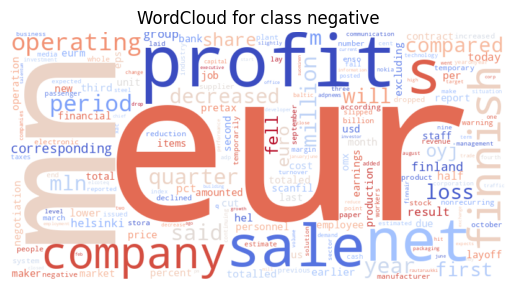

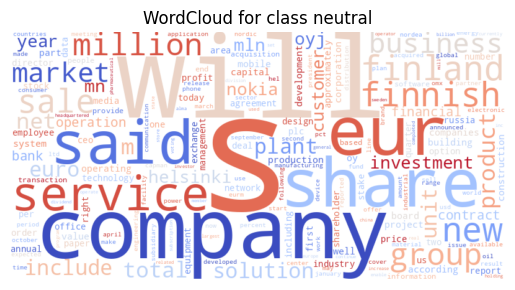

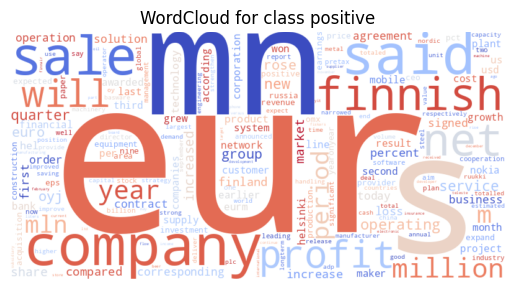

In [6]:
## Word cloud per class
from wordcloud import WordCloud, STOPWORDS 

# remove stopwords, make all words lowercase 
words_per_class = [[word.lower() for word in words if word not in STOPWORDS] for words in words_per_class]

for words, label in zip(words_per_class, LABELS):
    wordcloud = WordCloud(width=800, height=400, background_color="white", collocations=False, colormap="coolwarm", random_state=123).generate(" ".join(words))

    fig, ax = plt.subplots()
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(f"WordCloud for class {label}")
    ax.axis("off");

...